17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 147ms/step - accuracy: 0.5433 - loss: 0.6817 - val_accuracy: 0.6488 - val_loss: 0.6114
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 141ms/step - accuracy: 0.7572 - loss: 0.5022 - val_accuracy: 0.7680 - val_loss: 0.5285
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step - accuracy: 0.8231 - loss: 0.4031 - val_accuracy: 0.7822 - val_loss: 0.4681
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 143ms/step - accuracy: 0.8235 - loss: 0.4016 - val_accuracy: 0.6022 - val_loss: 0.7613
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 140ms/step - accuracy: 0.8476 - loss: 0.3546 - val_accuracy: 0.6810 - val_loss: 0.5877
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6824 - loss: 0.5871
RNN Test Accuracy: 68.15% | Loss: 0.5839


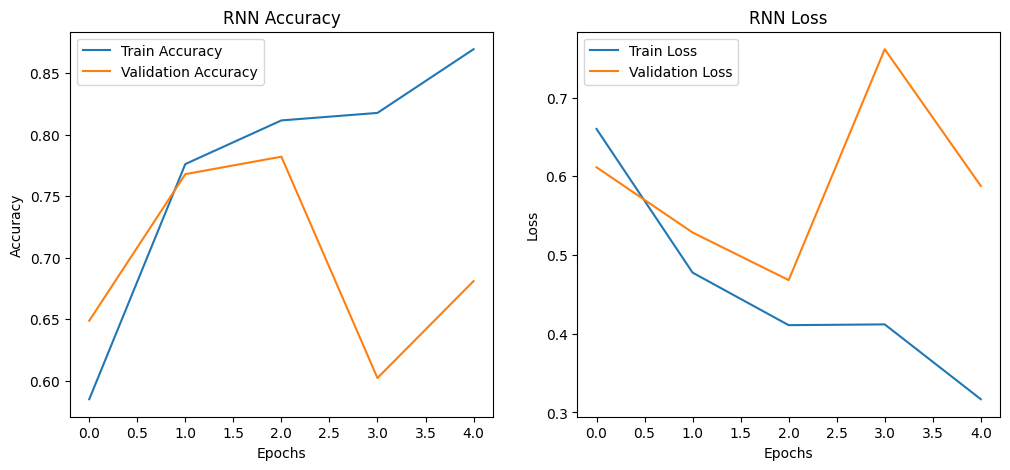

In [ ]:


# RNN Implementation
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

# Load IMDB dataset
vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build RNN model
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    SimpleRNN(128, dropout=0.2),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
rnn_history = rnn_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

# Evaluate model
rnn_score = rnn_model.evaluate(x_test, y_test)
print(f"RNN Test Accuracy: {rnn_score[1]*100:.2f}% | Loss: {rnn_score[0]:.4f}")

# Plot Accuracy and Loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
